In [32]:
# core
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# data
from sklearn.datasets import load_breast_cancer
%matplotlib inline

import warnings
#  Turning off  warnings as  RandomSearchCV() tends to generate quite many of warnings.
warnings.filterwarnings('ignore')

# Supervised Learning - Classification 

### Cancer Dataset

In [5]:
data = load_breast_cancer()
print(data["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
(
    X_train,
    X_test,
    y_train,
    y_test
) = train_test_split(
    data.data,
    data.target,
    stratify=data.target,
    test_size = 0.33,
    random_state=0
)

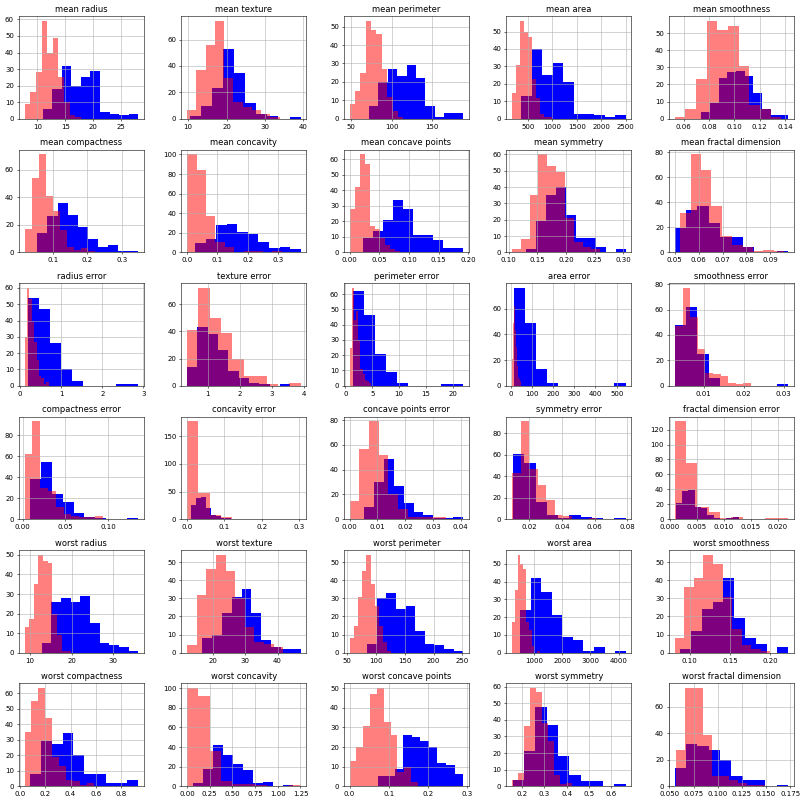

In [7]:
dataf = (
    pd.DataFrame(X_train, columns=data["feature_names"])
    .assign(target=y_train)
)
fig, axes = plt.subplots(figsize=(20,20), dpi=50, nrows=6, ncols=5)

# BLUE COLOR == 'benign', RED COLOR == 'malignant'
dataf[dataf["target"] == 0].drop("target", axis=1).hist(ax=axes, alpha=1, label='benign',color='b')
dataf[dataf["target"] == 1].drop("target", axis=1).hist(ax=axes, alpha=0.5, label='malignant',color='r');
del dataf, fig, axes # free memory

## Question 1
Exploratory data analysis (EDA)
- Print the target counts for your training data. 


In [11]:
# Print the target counts from training set
print("Sample counts per class:\n",
      {n: v for n, v in zip(data.target_names, np.bincount(y_train))})

Sample counts per class:
 {'malignant': 142, 'benign': 239}


In [9]:
print("Sample counts per class:\n",
      {n: v for n, v in zip(data.target_names, np.bincount(data.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


- **Observation:** 
    - 357 observations which account for 62.7% of all observations indicating the absence of cancer cells, 212 which account for 37.3% of all observations shows the presence of cancerous cell.
    - The percent is unusually large; the dataset does not represents in this case a typical medical analysis distribution. Typically, we will have a considerable large number of cases that represents negative vs. a small number of cases that represents positives (malignant) tumor.

- Explain, briefly and in bullets, what we may learn from the feature plots above. (For example, which features seem to be best differentiators between the two classes - benign and malignant) - BLUE COLOR == 'benign', RED COLOR == 'malignant'


- Based on the distributions above, would scaling be required for, say, a neural network?


Yes, scaling the features in the breast cancer dataset can be important for building a neural network model. Scaling is a pre-processing step that helps standardize the range of values for each feature, which can improve the performance of the model. Neural networks are sensitive to the scale of the input features, and large differences in range between the features can result in unstable and slow training or poor model performance.

- Industry reflections: Consider the data and its size. For this domain, is it enough data? Would you ask the domain experts anything?

The size of the breast cancer dataset, with 569 instances and 30 features, is considered to be a relatively small dataset. However, this does not necessarily mean that it is not enough data for the task. The amount of data required for building a model depends on the complexity of the problem and the model being used.

In the case of the breast cancer dataset, the problem is binary classification, which is relatively simple and the model can be trained on the available data. However, with such a small dataset, there is a risk of overfitting, where the model performs well on the training data but poorly on new unseen data. To mitigate this risk, it's important to use cross-validation and a test set to evaluate the model's performance on new data.

If the goal is to build a model with high accuracy and generalizability, it might be beneficial to ask the domain experts if there is any additional data available or if they have insights on the nature of the problem that could be useful for the model building process. For example, domain experts may have knowledge on the importance of specific features, which can be used to guide the feature selection process.

Overall, the size of the breast cancer dataset is considered small, but it can still be used to build a model for binary classification. To improve the model's performance, it is important to use cross-validation and a test set, and to seek input from domain experts if possible.

### Question 2
Create a KNeighborsClassifier for the above train and test data. Print the training and test accuracy. 
- (If using gridsearch on (X_train, y_train), document your choices of model parameters and ranges.)

In [14]:
# Building initial model - all parameters not specified are set to their defaults
knn = KNeighborsClassifier()

# Train - Fitting the model to training set
knn.fit(X_train, y_train)

# Reporting scores on training and testing set
print(f'Model: {knn}')
print('Accuracy on the training set: {:.3f}'.format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.3f}'.format(knn.score(X_test, y_test)))  

Model: KNeighborsClassifier()
Accuracy on the training set: 0.945
Accuracy on test set: 0.915


- Bonus: Use .predict_proba and plot the result using plt.hist(probas[:, 1]) - What can this tell us?

Text(0, 0.5, 'Frequency')

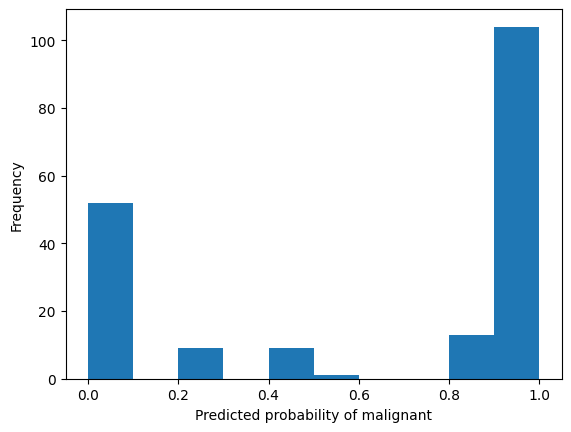

In [15]:
# Plotting predicted probability of malignancy from knn model
# based on data from test set
probas = knn.predict_proba(X_test)
# creating histogram with 10 mins to show the frequency of probas
plt.hist(probas[:, 1], bins=10)
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')

## Question 3
We'd like to try several other models. To save some work, write a function called eval_model that takes two arguments
<ul>
    <li>model: an instantiated classifier model</li>
    <li>name: a string, eg, "knn"</li>
</ul>
    
You can create a model like this:

knn = KNeighborsClassifier()

Then you can pass knn to the function as the model. The function should fit the model to X_train, and y_train, which should already be defined as global variables. Then it should score to model on the training and test data. X_test and y_test should also be defined as global variables.

- You can use gridsearch in the function. Same rules as stated in Q2




In [34]:
# Defining a function that evaluates a given model on a dataset and returns the test and train accuracies 
# GridSearchCV is implemented to find the optimal hyperparameters

def eval_model(model, name, param_grid, scaler = None, _X_train = X_train, _X_test = X_test, _y_train = y_train, _y_test = y_test):

    # If a scaler is provided, scale the training and test data
    if scaler:
        _X_train = scaler.fit_transform(_X_train)
        _X_test = scaler.transform(_X_test)
    
    # Use GridSearchCV to find the best hyperparameters for the model
    grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(_X_train, _y_train)
    
    # Print the name of the model and the best hyperparameters
    print(name, ":")
    print("Best hyperparameters: ", grid_search.best_params_)
    
    # Evaluate the model on the test and training data using the best hyperparameters
    test_accuracy = grid_search.score(_X_test, _y_test)
    train_accuracy = grid_search.score(_X_train, _y_train)
    
    # Print the accuracies
    print(f'Training Accuracy: {train_accuracy}')
    print(f'Test Accuracy: {test_accuracy}\n')
    
    # Return the test and train accuracies
    return (test_accuracy, train_accuracy)

Text(0, 0.5, 'Frequency')

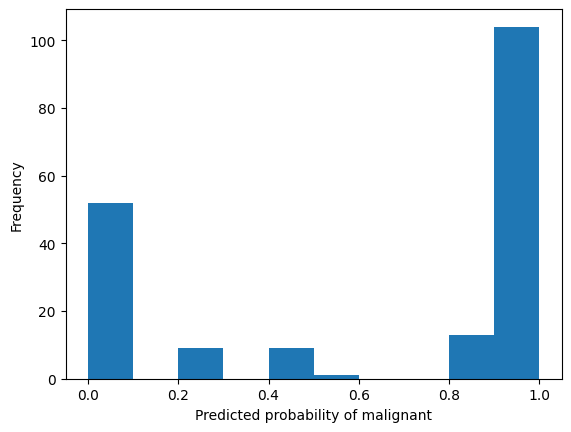

In [27]:
# Plotting predicted probability of malignancy from knn model
# based on data from test set
probas = knn.predict_proba(X_test)
# creating histogram with 10 mins to show the frequency of probas
plt.hist(probas[:, 1], bins=10)
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')

## Question 4
Now use eval_model to evaluate LogisticRegression, DecisionTreeClassifier, RandomForestClassifier and MLPClassifier. 

 

Logistic Regression :
Best hyperparameters:  {'C': 10}
Training Accuracy: 0.9816272965879265
Test Accuracy: 0.9414893617021277

Decision Tree :
Best hyperparameters:  {'max_depth': 5}
Training Accuracy: 0.9921259842519685
Test Accuracy: 0.9361702127659575

Random Forest :
Best hyperparameters:  {'n_estimators': 100}
Training Accuracy: 1.0
Test Accuracy: 0.9521276595744681

MLP :
Best hyperparameters:  {'hidden_layer_sizes': (20,)}
Training Accuracy: 0.9606299212598425
Test Accuracy: 0.9468085106382979



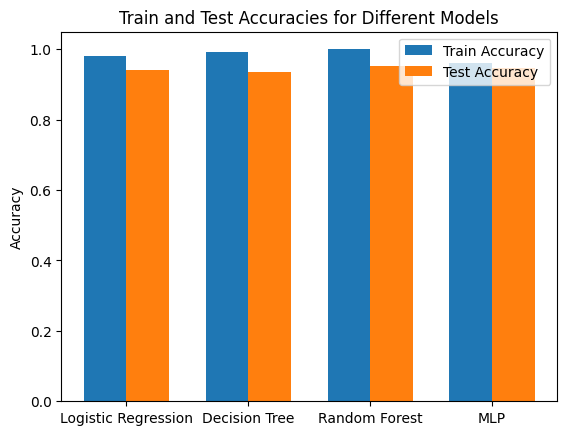

In [36]:
# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=10_000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=10_000)
}

# Define the hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [1, 5, 10, None]},
    "Random Forest": {"n_estimators": [10, 50, 100]},
    "MLP": {"hidden_layer_sizes": [(10,), (20,), (30,)]}
}

# Evaluate each model using eval_model()
test_accs = []
train_accs = []

for name, model in models.items():
    test_acc, train_acc = eval_model(model, name, param_grid=param_grids[name], _X_train=X_train, _X_test=X_test, _y_train=y_train, _y_test=y_test)
    test_accs.append(test_acc)
    train_accs.append(train_acc)
    


**Bonus:** Plot the train and test accuracies for all estimators in a bar chart (Is this a fair comparison?)

In [ ]:
# Plot the train and test accuracies for all models in a bar chart
labels = list(models.keys())
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accs, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_accs, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracies for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Question 5:
Apply a scaling method (e.g., standard scaling) to your data and repeat question 4 with the scaled data.
- Remember that (X_test, y_test) are meant to be unseen data. Use this to decide what the scaler should fit to and transform on.
- Report the results of scaling the data


In [37]:
# Define the models to evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=10_000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=10_000)
}

# Define the hyperparameter grids for each model
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10]},
    "Decision Tree": {"max_depth": [1, 5, 10, None]},
    "Random Forest": {"n_estimators": [10, 50, 100]},
    "MLP": {"hidden_layer_sizes": [(10,), (20,), (30,)]}
}

# Evaluate each model using eval_model()
test_accs = []
train_accs = []

for name, model in models.items():
    test_acc, train_acc = eval_model(model, name, param_grid=param_grids[name], scaler=StandardScaler(), _X_train=X_train, _X_test=X_test, _y_train=y_train, _y_test=y_test)
    test_accs.append(test_acc)
    train_accs.append(train_acc)
    


Logistic Regression :
Best hyperparameters:  {'C': 1}
Training Accuracy: 0.9921259842519685
Test Accuracy: 0.9627659574468085

Decision Tree :
Best hyperparameters:  {'max_depth': 10}
Training Accuracy: 1.0
Test Accuracy: 0.9414893617021277

Random Forest :
Best hyperparameters:  {'n_estimators': 10}
Training Accuracy: 1.0
Test Accuracy: 0.9521276595744681

MLP :
Best hyperparameters:  {'hidden_layer_sizes': (10,)}
Training Accuracy: 0.9921259842519685
Test Accuracy: 0.9627659574468085



**Bonus:** Explain what the scaler accomplishes for us.

The scaler object in the eval_model() function is used to normalize the input features. Normalization is a common preprocessing step that is often applied to the features of a machine learning dataset. Normalizing the features can be useful because it can prevent features with larger ranges from dominating the learning algorithm during training.

For example, imagine a dataset that has two features: "age" (which ranges from 0 to 100) and "income" (which ranges from 0 to 1,000,000). Without normalization, the learning algorithm might be biased towards the "income" feature, simply because it has a larger range than the "age" feature. By normalizing the features, we can make sure that each feature contributes equally to the learning algorithm.

In the eval_model() function, the scaler object is used to fit a normalization function to the training data (_X_train). The normalization function is then used to transform both the training and testing data (_X_train and _X_test, respectively). Note that the scaler object is only used if it is provided as an argument to the function (i.e., if the scaler argument is not None).

There are many different normalization techniques, and different techniques may be more appropriate for different types of data. The StandardScaler from the sklearn.preprocessing module, which is used in the eval_model() function, is a common normalization technique that scales the data so that each feature has zero mean and unit variance.

## Question 6
Train a logistic regression estimator on a scaled version of X_train.


In [38]:
# Create a LogisticRegression object with a maximum number of iterations of 10,000
logreg = LogisticRegression(max_iter=10_000)

# Create a StandardScaler object for normalizing the data
scaler = StandardScaler()

# Normalize the training data using the scaler's fit_transform() method
X_train_scaled = scaler.fit_transform(X_train)

# Normalize the test data using the scaler's transform() method
X_test_scaled = scaler.transform(X_test)

# Fit the logistic regression model to the normalized training data and target values
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)


Then print the three features with the highest coefficients -- these are the features which the model most strongly links with the target, <i>malignant</i>. Print the three features with the lowest coefficients -- these are the features which the model most strongly links with the target, <i>benign</i>. On each line, print the feature name, followed by its coefficient value.

In [39]:
# Get the coefficients for the logistic regression model
coefs = logreg.coef_[0]

# Sort the coefficients in descending order and store them in a list of tuples
# Each tuple contains a feature name and its corresponding coefficient
sorted_coefs = sorted((zip(data.feature_names, coefs)),
                      key=lambda e:e[1], reverse=True)

# Print the top 3 highest coefficients (corresponding to features that are most predictive of malignancy)
print("Highest Coefficients (Malignant)")
for c in sorted_coefs[:3]:
    print(c)

# Print the top 3 lowest coefficients (corresponding to features that are most predictive of benignancy)
print("\nLowest Coefficients (Malignant)")
for c in sorted_coefs[-3:]:
    print(c)


Highest Coefficients (Malignant)
('compactness error', 0.5975211218199212)
('symmetry error', 0.4860319396331134)
('fractal dimension error', 0.3996778212896199)

Lowest Coefficients (Malignant)
('mean concave points', -1.0121099296381788)
('radius error', -1.0580748755106266)
('worst texture', -1.0724828206381871)


**Bonus:** Plot the coefficients in a bar chart (*plt.bar()*) with the variable names on the x axis

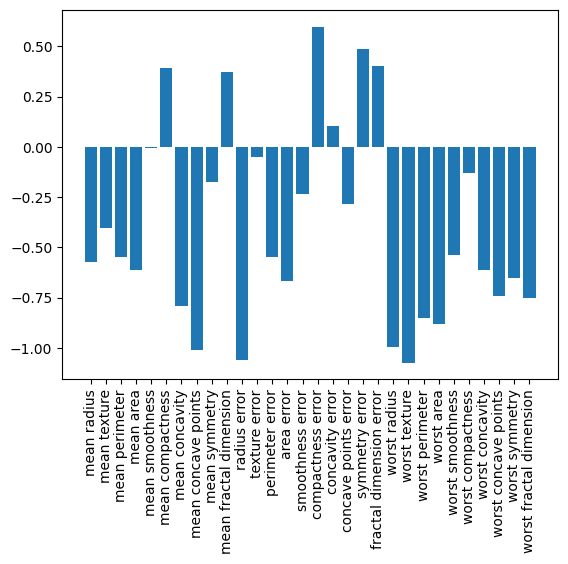

In [40]:
# Plot the feature importance using a bar chart
plt.bar(data.feature_names, logreg.coef_[0])

# Rotate the x-axis labels by 90 degrees to make them easier to read
plt.xticks(rotation=90)

# Display the plot
plt.show()

## Question 7
Print the 3 features that are the <i>least</i> informative about our target value (Hint: you should use the absolute value of coefficients.)

In [41]:
# Get the coefficients for the logistic regression model
coefs = logreg.coef_[0]

# Calculate the absolute values of the coefficients
c_abs = list(map(abs, coefs))

# Sort the coefficients in descending order of absolute value, and store them in a list of tuples
# Each tuple contains a feature name and its corresponding absolute coefficient value
sorted_coefs = sorted((zip(data.feature_names, c_abs)),
                      key=lambda e:e[1], reverse=True)

# Print the top 3 lowest absolute coefficients (corresponding to the least informative features)
print("Lowest Coefficients (Abs Value)")
for c in sorted_coefs[-3:]:
    print(c)

Lowest Coefficients (Abs Value)
('concavity error', 0.10345870287054103)
('texture error', 0.051087632539222286)
('mean smoothness', 0.0056197498835869105)


## Question 8
Use the classification_report function with the logreg model. It takes two arguments:
<ul>
    <li>y_test: the correct classifications</li>
    <li>preds: the model predictions. (You should assign logreg.predict(X_test) to preds.)</li>
    </ul>
    
There is an optional third argument, which is the feature names. You can write target_names=data.target_names.
        

In [42]:
# Generate predictions on the test data using the logistic regression model
preds = logreg.predict(X_test_scaled)

# Print a classification report comparing the true target values to the predicted target values
# The report includes precision, recall, f1-score, and support metrics for each target class.
# The target names are taken from the `data` object.
print(classification_report(y_test, preds, target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.94      0.96      0.95        70
      benign       0.97      0.97      0.97       118

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



## Question 9
For prediction probabilities (.predict_proba), predictions are related to these probabilities as follows: If the second probability is greater than .5, the prediction is 1. Otherwise, it's 0.  

1. Use the predict_proba method to get the probabilities of the logreg predictions on the X_test data. 
- Bonus: As in Q2, plot the the probabilities of class 1 (Malignant) and compare the plot with the same plot from Q2




Text(0, 0.5, 'Frequency')

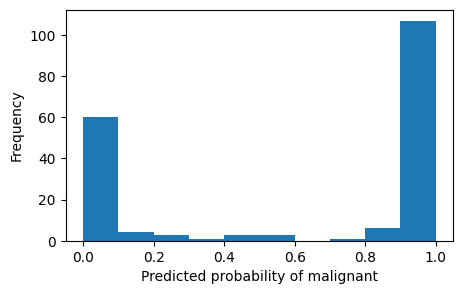

In [43]:
# Generate predicted probabilities of the test data belonging to each target class using the logistic regression model
probas = logreg.predict_proba(X_test_scaled)

# Create a histogram of the predicted probabilities for the malignant class (class 1)
# The predicted probabilities are taken from the second column of the probas array.
# The number of bins in the histogram is set to 10.
plt.figure(figsize=(5, 3))
plt.hist(probas[:, 1], bins=10)

# Set the x and y axis labels for the plot
plt.xlabel('Predicted probability of malignant')
plt.ylabel('Frequency')


2. Convert the probabilites to an arrray of predictions by mapping the following lambda function <br>
lambda a:1 if a[1]>.5 else 0


In [45]:
preds = list(map(lambda x: 1 if x > 0.5 else 0, probas[:, 1]))

3. Show that the resulting array is equal to the original preds array, e.g., using numpy.array.equal or all()

In [46]:
all(preds == logreg.predict(X_test_scaled))

True

4. Try to make the code below under *'Accuracies over probabilities* work. You need to supply 'preds' (from .predict) and 'probas' (from .predict_proba) - What can the resulting plot tell us about our model?

### Accuracy over probabilities

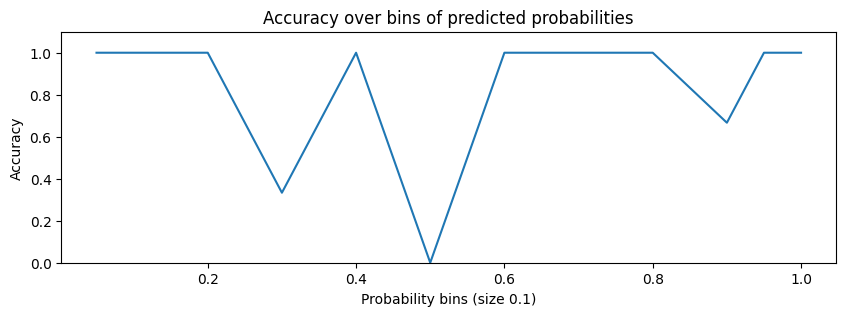

In [47]:
preds_df = (
    pd.DataFrame(
        {
            "preds": preds, # the predicted class
             "probas": probas[:, 1], # the predicted probability of class 1
             "y_test": y_test, # the true class
             "proba_bins": pd.cut(probas[:, 1], bins=20) # the bins (0.05) of the predicted probability
        }
    )
)

intervals, accs = [], []
for idx, interval in preds_df.groupby("proba_bins"):
    if not interval.empty:
        intervals.append(idx.right)
        accs.append(accuracy_score(interval["y_test"], interval["preds"]))

# plot accs over intervals
plt.figure(figsize=(10, 3))
plt.plot(intervals, accs) 
plt.xlabel("Probability bins (size 0.1)")
plt.ylabel("Accuracy")
plt.ylim(.0, 1.1)
plt.title("Accuracy over bins of predicted probabilities");

## Question 10
Write a function, predict_threshold, that takes two arguments:
<ul>
    <li>probas: the output of predict_proba (for a binary classification task)</li>
    <li>t: a threshold probability. Class 1 is predicted if the probability is greater than t. Otherwise class 0 is predicted.</li>
</ul>

In [48]:
# This function takes in a list of predicted probabilities for a binary classification task, as well as a threshold value.
def predict_threshold(predsProb, t):
    # The function uses the map function to apply a lambda function to each element in the input list of predicted probabilities.
    # The lambda function checks if the second element of the tuple (which corresponds to the probability of the positive class) is greater than the threshold t.
    # If the probability is greater than the threshold, the function returns a 1. Otherwise, it returns a 0.
    # The resulting list of 1's and 0's is converted into a numpy array and returned.
    return np.array(list(map(lambda a:1 if a[1]>t else 0, predsProb)))


Now produce a classification report for several different thresholds, using the probabilities output by logistic regression for the Cancer data. 
- Find a threshold that maximizes the precision for benign. 
- Find a threshold that maximizes precision for malignant. 
- Experiment with different thresholds -- what do you think is the best theshold for this particular domain - Predicting breast cancer? Why?

In [49]:
# Use the fitted logistic regression model to predict class probabilities for the scaled test data
preds = logreg.predict_proba(X_test_scaled)


In [50]:
# Calculate and print the classification report for the test data using the predicted probabilities and a threshold of 0.5
print(classification_report(y_test, predict_threshold(preds, 0.5), target_names=data.target_names))


              precision    recall  f1-score   support

   malignant       0.94      0.96      0.95        70
      benign       0.97      0.97      0.97       118

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [51]:
# Threshold of 0.9
print(classification_report(y_test, predict_threshold(preds,.9), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.86      1.00      0.93        70
      benign       1.00      0.91      0.95       118

    accuracy                           0.94       188
   macro avg       0.93      0.95      0.94       188
weighted avg       0.95      0.94      0.94       188



In [52]:
# Threshold of 0.99
print(classification_report(y_test, predict_threshold(preds,.99), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.65      1.00      0.79        70
      benign       1.00      0.69      0.81       118

    accuracy                           0.80       188
   macro avg       0.83      0.84      0.80       188
weighted avg       0.87      0.80      0.81       188



In [53]:
# Threshold of 0.1
print(classification_report(y_test, predict_threshold(preds,.01), target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       1.00      0.81      0.90        70
      benign       0.90      1.00      0.95       118

    accuracy                           0.93       188
   macro avg       0.95      0.91      0.92       188
weighted avg       0.94      0.93      0.93       188

